# Models

Firstly, we need to import the libraries we will use.

In [1218]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import lightgbm as lgb
import xgboost as xgb
import catboost as cat
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

Secondly, we need to load the data.

In [1219]:
train = pd.read_csv('train_engineered.csv')
test = pd.read_csv('test_engineered.csv')

In [1220]:
# print the title of each column of the train dataset
print(train.columns.values)

['Unnamed: 0' 'id' 'belongs_to_collection' 'original_budget'
 'budget_processed' 'genre_rank' 'num_genres' 'has_homepage'
 'originally_english' 'topStudio' 'numTopStudios' 'num_studios'
 'studioRank' 'num_production_countries' 'topCountry' 'countryRank'
 'usa_produced' '1960s' '1970s' '1980s' '1990s' '2000s' '2010s'
 'mondayRelease' 'tuesdayRelease' 'wednesdayRelease' 'thursdayRelease'
 'fridayRelease' 'saturdayRelease' 'sundayRelease' 'Winter' 'Fall'
 'Spring' 'Summer' 'runtime_processed' 'spoken_english' 'num_languages'
 'has_tagline' 'num_keywords' 'numTopKeywords' 'keywordRank' 'cast_num'
 'topLeadActor' 'numTopActors' 'actorRanks' 'topActorRank' 'crew_num'
 'topLeadDirector' 'numTopDirectors' 'directorsRank' 'topLeadExecProd'
 'numTopExecProd' 'execProdRank' 'topLeadProducer' 'numTopProducers'
 'producersRank' 'topLeadComposer' 'numTopComposers' 'composersRank'
 'topLeadDirectorPhoto' 'numTopDirectorsPhoto' 'directorsPhotoRank'
 'topLeadEditor' 'numTopEditors' 'editorsRank' 'budge

In [1221]:
# print the title of each column of the test dataset
print(test.columns.values)

['Unnamed: 0' 'id' 'belongs_to_collection' 'original_budget'
 'budget_processed' 'genre_rank' 'num_genres' 'has_homepage'
 'originally_english' 'topStudio' 'numTopStudios' 'num_studios'
 'studioRank' 'num_production_countries' 'topCountry' 'countryRank'
 'usa_produced' '1960s' '1970s' '1980s' '1990s' '2000s' '2010s'
 'mondayRelease' 'tuesdayRelease' 'wednesdayRelease' 'thursdayRelease'
 'fridayRelease' 'saturdayRelease' 'sundayRelease' 'Winter' 'Fall'
 'Spring' 'Summer' 'runtime_processed' 'spoken_english' 'num_languages'
 'has_tagline' 'num_keywords' 'numTopKeywords' 'keywordRank' 'cast_num'
 'topLeadActor' 'numTopActors' 'actorRanks' 'topActorRank' 'crew_num'
 'topLeadDirector' 'numTopDirectors' 'directorsRank' 'topLeadExecProd'
 'numTopExecProd' 'execProdRank' 'topLeadProducer' 'numTopProducers'
 'producersRank' 'topLeadComposer' 'numTopComposers' 'composersRank'
 'topLeadDirectorPhoto' 'numTopDirectorsPhoto' 'directorsPhotoRank'
 'topLeadEditor' 'numTopEditors' 'editorsRank' 'budge

In [1222]:
train['log_budget']=np.log1p(train['original_budget'])
test['log_budget']=np.log1p(test['original_budget'])

## Error Detection Models
Error Detection Models are used to detect errors in the dataset. It is a classier that classifies the data into two classes: error and non-error. We will use lightgbm as our error detection model.

### 1. data preparation

Firstly, we need to prepare the data for the error detection model. We will use the data from the previous notebook. By plotting the distribution of the data, we can see seperation between the error and non-error data by recognizing the outliers and abnormal data.

C:\Users\zjy\AppData\Local\Temp\ipykernel_22428\4229348723.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['revenue'], kde=False)


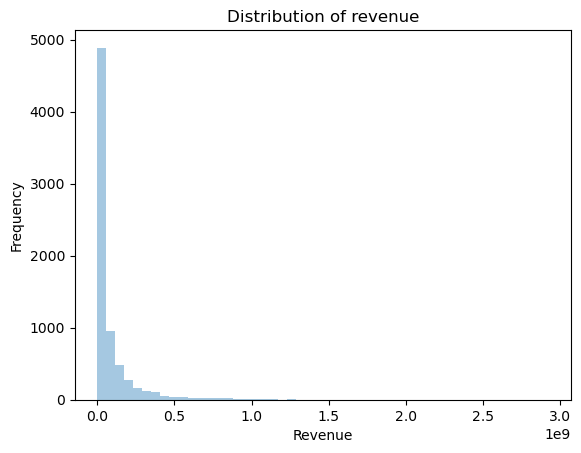

In [1223]:
#plot the distribution of the revenue in the training set
sns.distplot(train['revenue'], kde=False)
plt.title('Distribution of revenue')
plt.xlabel('Revenue')
plt.ylabel('Frequency')
plt.show()

C:\Users\zjy\AppData\Local\Temp\ipykernel_22428\1025018483.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['original_budget'], kde=False)


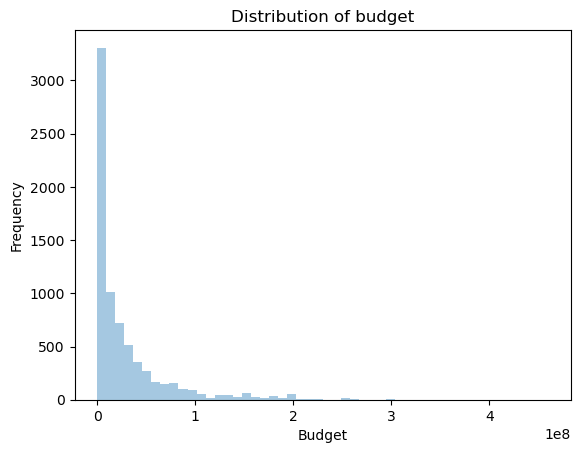

In [1224]:
#plot the distribution of the budget in the training set
sns.distplot(train['original_budget'], kde=False)
plt.title('Distribution of budget')
plt.xlabel('Budget')
plt.ylabel('Frequency')
plt.show()

C:\Users\zjy\AppData\Local\Temp\ipykernel_22428\668996526.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['log_revenue'], kde=False)


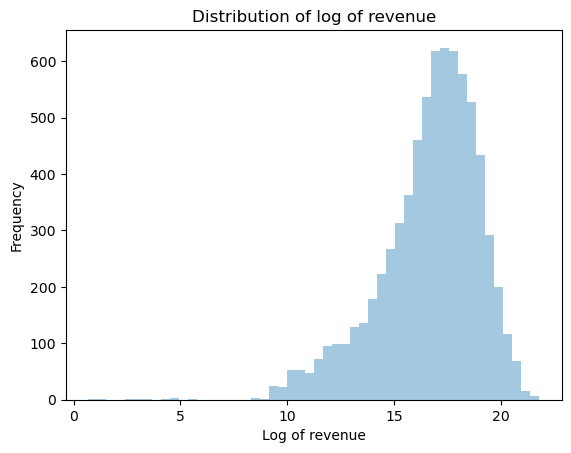

In [1225]:
# plot the distribution of the log of the revenue in the training set
sns.distplot(train['log_revenue'], kde=False)
plt.title('Distribution of log of revenue')
plt.xlabel('Log of revenue')
plt.ylabel('Frequency')
plt.show()

C:\Users\zjy\AppData\Local\Temp\ipykernel_22428\3171513416.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['log_budget'], kde=False)


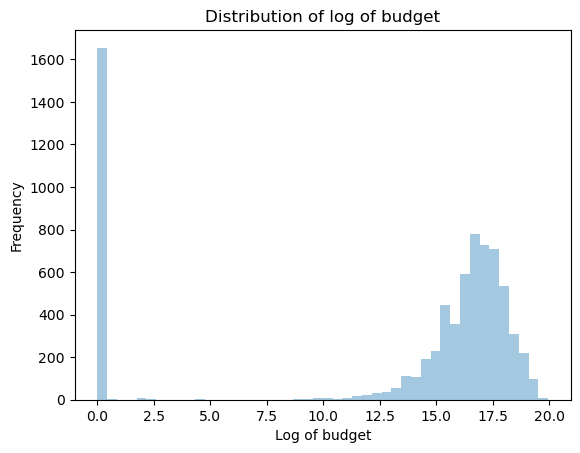

In [1226]:
# plot the distribution of the log of the budget in the training set
sns.distplot(train['log_budget'], kde=False)
plt.title('Distribution of log of budget')
plt.xlabel('Log of budget')
plt.ylabel('Frequency')
plt.show()

By seeing the graph above, we will divide the data into two parts: error and non-error and label them as 1 and 0 respectively. We will use these labels to train the error detection model.

In [1227]:
#store all the data that is zero in budget or revenue in a new dataframe called error
#store all the data that is not zero in budget or revenue in a new dataframe called non_error_train
error_train = train[(train['revenue'] == 0) | (train['original_budget'] == 0)]
non_error_train = train[(train['original_budget'] != 0) & (train['revenue'] != 0)]
#move all the data whose log_budegt is less than 10 in non-error to the error dataframe
temp = non_error_train[non_error_train['log_budget'] < 10]
error_train = error_train._append(temp, ignore_index=True)
non_error_train = non_error_train[non_error_train['log_budget'] >= 10]
#move all the data whose log_revenue is less than 7.5 in non-error to the error dataframe
temp = non_error_train[non_error_train['log_revenue'] < 7.5]
error_train = error_train._append(temp, ignore_index=True)
non_error_train = non_error_train[non_error_train['log_revenue'] >= 7.5]

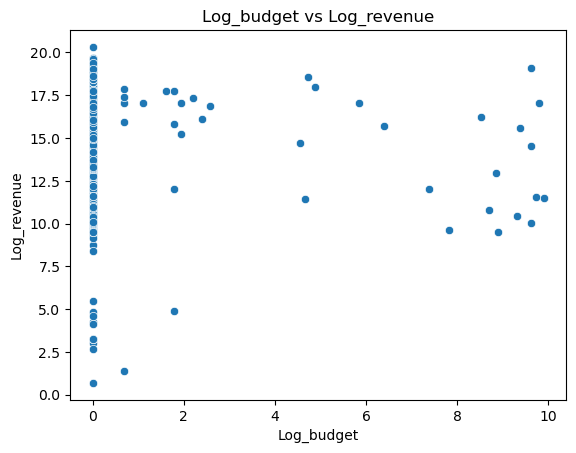

In [1228]:
#plot the distribution of the log_budegt against the log_revenue in the error set
sns.scatterplot(x='log_budget', y='log_revenue', data=error_train)
plt.title('Log_budget vs Log_revenue')
plt.xlabel('Log_budget')
plt.ylabel('Log_revenue')
plt.show()

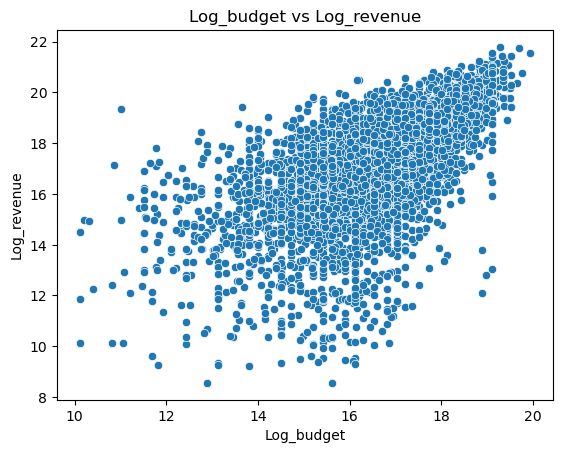

In [1229]:
#plot the distribution of the log_budegt against the log_revenue in the non-error set
sns.scatterplot(x='log_budget', y='log_revenue', data=non_error_train)
plt.title('Log_budget vs Log_revenue')
plt.xlabel('Log_budget')
plt.ylabel('Log_revenue')
plt.show()

In [1230]:
#label the error set as 1 and the non-error set as 0
error_train['error'] = 1
non_error_train['error'] = 0
#combine the error and non-error set
train_labeled = error_train._append(non_error_train, ignore_index=True)

In [1231]:
# split the training set into training and validation set, with a evenly distributed error and non-error set
train_labeled, val_labeled = train_test_split(train_labeled, test_size=0.2, random_state=42, stratify=train_labeled['error'])

### 2. training

In [1232]:
# feature_classification selection
feature_classification = [ 'original_budget', 'budget_processed', 'genre_rank',
                            'inflationBudget', 'popularity_year_ratio']
# target
target = 'error'

# split the feature_classification and target in the training set
X_train = train_labeled[feature_classification]
y_train = train_labeled[target]
# split the feature_classification and target in the validation set
X_val = val_labeled[feature_classification]
y_val = val_labeled[target]

# create a lgb dataset for training
train_data = lgb.Dataset(X_train, label=y_train)
# create a lgb dataset for validation
val_data = lgb.Dataset(X_val, label=y_val)

# set the parameters for the lgb model
param = {'num_leaves': 30,
          'objective': 'binary',
          'metric': 'auc',
          'max_depth': 5,
          'learning_rate': 0.1,
          'feature_fraction': 0.9,
          'min_data_in_leaf': 5,
          'bagging_fraction': 0.9,
          'bagging_freq': 1,
          'lambda_l1': 1,
          'lambda_l2': 1,
          'verbose': -1}
# train the lgb model
lgb_error_detection = lgb.train(param, train_data, valid_sets=[val_data])

# predict the validation set
y_pred = lgb_error_detection.predict(X_val, num_iteration=lgb_error_detection.best_iteration)
# convert the prediction to binary
for i in range(len(y_pred)):
    if y_pred[i] >= 0.5:
        y_pred[i] = 1
    else:
        y_pred[i] = 0

# calculate the accuracy, precision, recall and f1 score
accuracy = sum(y_pred == y_val) / len(y_val)
print(accuracy)
precision = sum((y_pred == 1) & (y_val == 1)) / sum(y_pred == 1)
print(precision)
recall = sum((y_pred == 1) & (y_val == 1)) / sum(y_val == 1)
print(recall)
f1 = 2 * precision * recall / (precision + recall)
print(f1)

0.9993141289437586
1.0
0.9970414201183432
0.9985185185185186


### 3. save the model

In [1233]:
# save the model
lgb_error_detection.save_model('model/lgb_error_detection.pkl')

### 4. prediction

In [1234]:
# predict the test set
y_pred = lgb_error_detection.predict(test[feature_classification], num_iteration=lgb_error_detection.best_iteration)
# convert the prediction to binary
for i in range(len(y_pred)):
    if y_pred[i] >= 0.5:
        y_pred[i] = 1
    else:
        y_pred[i] = 0
test['error'] = y_pred

In [1235]:
# predict the error set using the error detection model
y_pred = lgb_error_detection.predict(error_train[feature_classification], num_iteration=lgb_error_detection.best_iteration)
# convert the prediction to binary
for i in range(len(y_pred)):
    if y_pred[i] >= 0.5:
        y_pred[i] = 1
    else:
        y_pred[i] = 0
error_train['error'] = y_pred

# split the test set into error and non-error set
error_test = test[test['error'] == 1]
non_error_test = test[test['error'] == 0]

In [1236]:
print(error_test.shape)
print(non_error_test.shape)

(1256, 72)
(3142, 72)


## Models for revenue prediction

### 1. Model for error-free data

we will use 3 models: lightgbm, xgboost, and catboost. Then we will use the average of the predictions of these models as our final prediction.

Use Five-Fold Cross Validation to Evaluate the Model

In [1237]:
# split the training set into training and validation set, use Five-Fold Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
# feature selection
#'belongs_to_collection' 'original_budget'
#  'budget_processed' 'genre_rank' 'num_genres' 'has_homepage'
#  'originally_english' 'topStudio' 'numTopStudios' 'num_studios'
#  'studioRank' 'num_production_countries' 'topCountry' 'countryRank'
#  'usa_produced' '1960s' '1970s' '1980s' '1990s' '2000s' '2010s'
#  'mondayRelease' 'tuesdayRelease' 'wednesdayRelease' 'thursdayRelease'
#  'fridayRelease' 'saturdayRelease' 'sundayRelease' 'Winter' 'Fall'
#  'Spring' 'Summer' 'runtime_processed' 'spoken_english' 'num_languages'
#  'has_tagline' 'num_keywords' 'numTopKeywords' 'keywordRank' 'cast_num'
#  'topLeadActor' 'numTopActors' 'actorRanks' 'topActorRank' 'crew_num'
#  'topLeadDirector' 'numTopDirectors' 'directorsRank' 'topLeadExecProd'
#  'numTopExecProd' 'execProdRank' 'topLeadProducer' 'numTopProducers'
#  'producersRank' 'topLeadComposer' 'numTopComposers' 'composersRank'
#  'topLeadDirectorPhoto' 'numTopDirectorsPhoto' 'directorsPhotoRank'
#  'topLeadEditor' 'numTopEditors' 'editorsRank' 'budget_to_year_ratio'
#  'runtime_to_year_ratio' 'inflationBudget' 'popularity'
#  'popularity_year_ratio'
feature_regression = ['belongs_to_collection', 'original_budget', 'budget_processed', 'genre_rank',
                        'num_genres', 'has_homepage', 'originally_english', 'topStudio', 'numTopStudios',
                        'num_studios', 'studioRank', 'num_production_countries', 'topCountry', 'countryRank',
                        'usa_produced', '1960s', '1970s', '1980s', '1990s', '2000s', '2010s', 'mondayRelease',
                        'tuesdayRelease', 'wednesdayRelease', 'thursdayRelease', 'fridayRelease', 'saturdayRelease',
                        'sundayRelease', 'Winter', 'Fall', 'Spring', 'Summer', 'runtime_processed', 'spoken_english',
                        'num_languages', 'has_tagline', 'num_keywords', 'numTopKeywords', 'keywordRank', 'cast_num',
                        'topLeadActor', 'numTopActors', 'actorRanks', 'topActorRank', 'crew_num', 'topLeadDirector',
                        'numTopDirectors', 'directorsRank', 'topLeadExecProd', 'numTopExecProd', 'execProdRank',
                        'topLeadProducer', 'numTopProducers', 'producersRank', 'topLeadComposer', 'numTopComposers',
                        'composersRank', 'topLeadDirectorPhoto', 'numTopDirectorsPhoto', 'directorsPhotoRank',
                        'topLeadEditor', 'numTopEditors', 'editorsRank', 'budget_to_year_ratio',
                        'runtime_to_year_ratio', 'inflationBudget', 'popularity', 'popularity_year_ratio']
target = 'revenue'

In [1238]:
# lightgbm
# set the parameters for the lgb model
param = {'num_leaves': 1000,
          'objective': 'regression',
          'metric': 'rmse',
          'max_depth': 8,
          'learning_rate': 0.05,
          'feature_fraction': 0.9,
          'min_data_in_leaf': 10,
          'bagging_fraction': 0.9,
          'bagging_freq': 1,
          'lambda_l1': 0.2,
          'lambda_l2': 1,
          'verbose': -1}
# train the lgb model
lgb_model_non_error = []
lgb_prediction = []
for train_index, val_index in kf.split(non_error_train):
    X_train, X_val = non_error_train.iloc[train_index][feature_regression], non_error_train.iloc[val_index][feature_regression]
    y_train, y_val = non_error_train.iloc[train_index][target], non_error_train.iloc[val_index][target]
    train_data = lgb.Dataset(X_train, label=y_train)
    val_data = lgb.Dataset(X_val, label=y_val)
    lgb_model = lgb.train(param, train_data, valid_sets=[val_data])
    lgb_model_non_error.append(lgb_model)
    # evaluate the model
    y_pred = lgb_model.predict(X_val, num_iteration=lgb_model.best_iteration)
    lgb_prediction.append(y_pred)
    # calculate the loss
    loss = np.sqrt(sum((y_pred - y_val) ** 2) / len(y_val))
    print(loss)



114081414.13177508
106521226.79082249
99340125.71784906
101946298.49780585
84543302.31243935


In [1239]:
# xgboost
# set the parameters for the xgb model
param = {'objective': 'reg:squarederror', 
              'eta': 0.01, 
              'max_depth': 8, 
              'subsample': 0.6, 
              'colsample_bytree': 0.7,  
              'eval_metric': 'rmse', 
}
# train the xgb model
xgb_model_non_error = []
xgb_prediction = []
for train_index, val_index in kf.split(non_error_train):
    X_train, X_val = non_error_train.iloc[train_index][feature_regression], non_error_train.iloc[val_index][feature_regression]
    y_train, y_val = non_error_train.iloc[train_index][target], non_error_train.iloc[val_index][target]
    train_data = xgb.DMatrix(X_train, label=y_train)
    val_data = xgb.DMatrix(X_val, label=y_val)
    xgb_model = xgb.train(param, train_data, evals=[(val_data, 'validation')])
    xgb_model_non_error.append(xgb_model)
    # evaluate the model
    y_pred = xgb_model.predict(val_data)
    xgb_prediction.append(y_pred)
    # calculate the loss
    loss = np.sqrt(sum((y_pred - y_val) ** 2) / len(y_val))
    print(loss)


[0]	validation-rmse:231854907.26827
[1]	validation-rmse:230494769.50142
[2]	validation-rmse:228941282.77333
[3]	validation-rmse:227622674.15333
[4]	validation-rmse:226377867.72760


[5]	validation-rmse:225133192.63726
[6]	validation-rmse:223818380.60245
[7]	validation-rmse:222491660.34616
[8]	validation-rmse:221265856.28649
[9]	validation-rmse:219995865.91447
219995865.7020555
[0]	validation-rmse:250688364.51005
[1]	validation-rmse:248948124.27338
[2]	validation-rmse:247316297.03879
[3]	validation-rmse:245743551.14243
[4]	validation-rmse:244286147.70933
[5]	validation-rmse:242825619.24306
[6]	validation-rmse:241180090.53570
[7]	validation-rmse:239761948.27116
[8]	validation-rmse:238281617.00939
[9]	validation-rmse:236845458.44729
236845457.134821
[0]	validation-rmse:210902068.39563


d:\anaconda3\envs\F30\Lib\site-packages\xgboost\data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
d:\anaconda3\envs\F30\Lib\site-packages\xgboost\data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
d:\anaconda3\envs\F30\Lib\site-packages\xgboost\data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
d:\anaconda3\envs\F30\Lib\site-packages\xgboost\data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
d:\anaconda3\envs\F30\L

[1]	validation-rmse:209599553.62325
[2]	validation-rmse:208177671.29903
[3]	validation-rmse:207024437.28909
[4]	validation-rmse:205844994.10896
[5]	validation-rmse:204654439.65615
[6]	validation-rmse:203236995.08138
[7]	validation-rmse:201999636.72717
[8]	validation-rmse:200786613.23642
[9]	validation-rmse:199751779.54654
199751778.7354869
[0]	validation-rmse:200238890.91531
[1]	validation-rmse:198929380.85962
[2]	validation-rmse:197497856.03426
[3]	validation-rmse:196064831.59145
[4]	validation-rmse:194697385.12582
[5]	validation-rmse:193347007.64687
[6]	validation-rmse:191972408.43108
[7]	validation-rmse:190622025.72844
[8]	validation-rmse:189284702.73486
[9]	validation-rmse:188183580.52151
188183580.8498525
[0]	validation-rmse:212561233.39794
[1]	validation-rmse:211030385.98645
[2]	validation-rmse:209468060.59349
[3]	validation-rmse:207816937.49908
[4]	validation-rmse:206295144.12963
[5]	validation-rmse:204838677.49409
[6]	validation-rmse:203385150.21053
[7]	validation-rmse:20193753

d:\anaconda3\envs\F30\Lib\site-packages\xgboost\data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
d:\anaconda3\envs\F30\Lib\site-packages\xgboost\data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
d:\anaconda3\envs\F30\Lib\site-packages\xgboost\data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
d:\anaconda3\envs\F30\Lib\site-packages\xgboost\data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
d:\anaconda3\envs\F30\L

In [1240]:
# catboost
# set the parameters for the cat model
param = {'iterations' : 10000,
        'learning_rate':0.004,
        'depth':5,
        'eval_metric':'RMSE',
        'colsample_bylevel':0.8,
        'bagging_temperature' : 0.2,
        'metric_period' : None,
        'early_stopping_rounds':200
}
# train the cat model
cat_model_non_error = []
cat_prediction = []
for train_index, val_index in kf.split(non_error_train):
    X_train, X_val = non_error_train.iloc[train_index][feature_regression], non_error_train.iloc[val_index][feature_regression]
    y_train, y_val = non_error_train.iloc[train_index][target], non_error_train.iloc[val_index][target]
    train_data = cat.Pool(X_train, label=y_train)
    val_data = cat.Pool(X_val, label=y_val)
    cat_model = cat.CatBoostRegressor(**param)
    cat_model.fit(train_data, eval_set=val_data)
    cat_model_non_error.append(cat_model)
    # evaluate the model
    y_pred = cat_model.predict(val_data)
    cat_prediction.append(y_pred)
    # calculate the loss
    loss = np.sqrt(sum((y_pred - y_val) ** 2) / len(y_val))
    print(loss)

0:	learn: 192727692.6739872	test: 204344203.9133681	best: 204344203.9133681 (0)	total: 2.08ms	remaining: 20.8s
1:	learn: 192289603.2819981	test: 203941820.7919578	best: 203941820.7919578 (1)	total: 4.51ms	remaining: 22.6s
2:	learn: 191877700.9330976	test: 203560281.5257027	best: 203560281.5257027 (2)	total: 6.2ms	remaining: 20.7s
3:	learn: 191460837.6133853	test: 203176390.4866575	best: 203176390.4866575 (3)	total: 8.5ms	remaining: 21.2s
4:	learn: 191029605.9347398	test: 202777461.6999238	best: 202777461.6999238 (4)	total: 10.4ms	remaining: 20.7s
5:	learn: 190608688.8852326	test: 202384614.4500252	best: 202384614.4500252 (5)	total: 11.9ms	remaining: 19.7s
6:	learn: 190209809.3622198	test: 202056362.4797034	best: 202056362.4797034 (6)	total: 14ms	remaining: 19.9s
7:	learn: 189807417.6282653	test: 201691048.6119071	best: 201691048.6119071 (7)	total: 15.4ms	remaining: 19.2s
8:	learn: 189374607.4886056	test: 201302079.6199480	best: 201302079.6199480 (8)	total: 17.3ms	remaining: 19.2s
9:	le

In [1241]:
# train a linear regression model to adjust the prediction of the three models

# split the non-error training set into training and validation set
X_train, X_val, y_train, y_val = train_test_split(non_error_train[feature_regression], non_error_train[target], test_size=0.2, random_state=42)

def prediction(model, data):
    pred = []
    for i in range(len(model)):
        pred.append(model[i].predict(data))
    pred = np.array(pred)
    pred = np.mean(pred, axis=0)
    return pred

# predict the training set using the three models
lgb_train = prediction(lgb_model_non_error, X_train)
xgb_train = prediction(xgb_model_non_error, xgb.DMatrix(X_train))
cat_train = prediction(cat_model_non_error, cat.Pool(X_train))

# train a linear regression model to adjust the prediction of the three models
lr_non_error = LinearRegression()
lr_non_error.fit(np.array([lgb_train, xgb_train, cat_train]).T, y_train)
print(lr_non_error.coef_)

# predict the validation set using the three models
lgb_val = prediction(lgb_model_non_error, X_val)
xgb_val = prediction(xgb_model_non_error, xgb.DMatrix(X_val))
cat_val = prediction(cat_model_non_error, cat.Pool(X_val))

# predict the validation set using the linear regression model
y_pred = lr_non_error.predict(np.array([lgb_val, xgb_val, cat_val]).T)

# calculate the loss
loss = np.sqrt(sum((y_pred - y_val) ** 2) / len(y_val))
print(loss)




[ 1.49764999 -8.11223943  0.21891474]
53825992.11640261


d:\anaconda3\envs\F30\Lib\site-packages\xgboost\data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
d:\anaconda3\envs\F30\Lib\site-packages\xgboost\data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
d:\anaconda3\envs\F30\Lib\site-packages\xgboost\data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
d:\anaconda3\envs\F30\Lib\site-packages\xgboost\data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
d:\anaconda3\envs\F30\L

### 2. Model for error data

In [1242]:
# lightgbm
# set the parameters for the lgb model
param = {'num_leaves': 1000,
          'objective': 'regression',
          'metric': 'rmse',
          'max_depth': 8,
          'learning_rate': 0.05,
          'feature_fraction': 0.9,
          'min_data_in_leaf': 10,
          'bagging_fraction': 0.9,
          'bagging_freq': 1,
          'lambda_l1': 0.2,
          'lambda_l2': 1,
          'verbose': -1}

# train the lgb model
lgb_model_error = []
lgb_prediction = []
for train_index, val_index in kf.split(error_train):
    X_train, X_val = error_train.iloc[train_index][feature_regression], error_train.iloc[val_index][feature_regression]
    y_train, y_val = error_train.iloc[train_index][target], error_train.iloc[val_index][target]
    train_data = lgb.Dataset(X_train, label=y_train)
    val_data = lgb.Dataset(X_val, label=y_val)
    lgb_model = lgb.train(param, train_data, valid_sets=[val_data])
    lgb_model_error.append(lgb_model)
    # evaluate the model
    y_pred = lgb_model.predict(X_val, num_iteration=lgb_model.best_iteration)
    lgb_prediction.append(y_pred)
    # calculate the loss
    loss = np.sqrt(sum((y_pred - y_val) ** 2) / len(y_val))
    print(loss)


16688994.362572614
28758831.198723044
22133651.75917019
33103020.08487199
19482891.32297526


In [1243]:
# xgboost
# set the parameters for the xgb model
param = {'objective': 'reg:squarederror', 
              'eta': 0.01, 
              'max_depth': 8, 
              'subsample': 0.6, 
              'colsample_bytree': 0.7,  
              'eval_metric': 'rmse', 
}
# train the xgb model
xgb_model_error = []
xgb_prediction = []
for train_index, val_index in kf.split(error_train):
    X_train, X_val = error_train.iloc[train_index][feature_regression], error_train.iloc[val_index][feature_regression]
    y_train, y_val = error_train.iloc[train_index][target], error_train.iloc[val_index][target]
    train_data = xgb.DMatrix(X_train, label=y_train)
    val_data = xgb.DMatrix(X_val, label=y_val)
    xgb_model = xgb.train(param, train_data, evals=[(val_data, 'validation')])
    xgb_model_error.append(xgb_model)
    # evaluate the model
    y_pred = xgb_model.predict(val_data)
    xgb_prediction.append(y_pred)
    # calculate the loss
    loss = np.sqrt(sum((y_pred - y_val) ** 2) / len(y_val))
    print(loss)


[0]	validation-rmse:29704571.96317
[1]	validation-rmse:29470492.79237
[2]	validation-rmse:29278419.21954
[3]	validation-rmse:29102491.81670
[4]	validation-rmse:28915611.29914
[5]	validation-rmse:28701383.78555


[6]	validation-rmse:28510041.40832
[7]	validation-rmse:28309276.71698
[8]	validation-rmse:28164762.92660
[9]	validation-rmse:28024193.77216
28024194.13491853
[0]	validation-rmse:44643797.28343
[1]	validation-rmse:44466545.60528
[2]	validation-rmse:44221953.23342
[3]	validation-rmse:44097253.43820
[4]	validation-rmse:43925157.81064
[5]	validation-rmse:43725128.81890
[6]	validation-rmse:43533842.42037
[7]	validation-rmse:43361490.05980
[8]	validation-rmse:43219685.47380
[9]	validation-rmse:43049224.02222
43049224.31873683
[0]	validation-rmse:33991163.99297


d:\anaconda3\envs\F30\Lib\site-packages\xgboost\data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
d:\anaconda3\envs\F30\Lib\site-packages\xgboost\data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
d:\anaconda3\envs\F30\Lib\site-packages\xgboost\data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
d:\anaconda3\envs\F30\Lib\site-packages\xgboost\data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
d:\anaconda3\envs\F30\L

[1]	validation-rmse:33794677.98853
[2]	validation-rmse:33634740.89692
[3]	validation-rmse:33528710.19787
[4]	validation-rmse:33406223.70702
[5]	validation-rmse:33275312.84428
[6]	validation-rmse:33163914.32803
[7]	validation-rmse:33021972.60969
[8]	validation-rmse:32919978.68847
[9]	validation-rmse:32748218.29576
32748218.228609025
[0]	validation-rmse:47161744.07142
[1]	validation-rmse:46914926.38020
[2]	validation-rmse:46688145.18227
[3]	validation-rmse:46550251.28110
[4]	validation-rmse:46325161.19250
[5]	validation-rmse:46100454.22752
[6]	validation-rmse:45936722.50108
[7]	validation-rmse:45830076.77946
[8]	validation-rmse:45641714.78146
[9]	validation-rmse:45446282.54228
45446281.92819653
[0]	validation-rmse:34258943.40875
[1]	validation-rmse:34088600.63924
[2]	validation-rmse:33844169.25951
[3]	validation-rmse:33708375.50543
[4]	validation-rmse:33458744.64836
[5]	validation-rmse:33246406.08946
[6]	validation-rmse:33107403.75496
[7]	validation-rmse:32958662.46815
[8]	validation-rms

d:\anaconda3\envs\F30\Lib\site-packages\xgboost\data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
d:\anaconda3\envs\F30\Lib\site-packages\xgboost\data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
d:\anaconda3\envs\F30\Lib\site-packages\xgboost\data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
d:\anaconda3\envs\F30\Lib\site-packages\xgboost\data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
d:\anaconda3\envs\F30\L

In [1244]:
# catboost
# set the parameters for the cat model
param = {'iterations' : 10000,
        'learning_rate':0.004,
        'depth':5,
        'eval_metric':'RMSE',
        'colsample_bylevel':0.8,
        'bagging_temperature' : 0.2,
        'metric_period' : None,
        'early_stopping_rounds':200
}
# train the cat model
cat_model_error = []
cat_prediction = []
for train_index, val_index in kf.split(error_train):
    X_train, X_val = error_train.iloc[train_index][feature_regression], error_train.iloc[val_index][feature_regression]
    y_train, y_val = error_train.iloc[train_index][target], error_train.iloc[val_index][target]
    train_data = cat.Pool(X_train, label=y_train)
    val_data = cat.Pool(X_val, label=y_val)
    cat_model = cat.CatBoostRegressor(**param)
    cat_model.fit(train_data, eval_set=val_data)
    cat_model_error.append(cat_model)
    # evaluate the model
    y_pred = cat_model.predict(val_data)
    cat_prediction.append(y_pred)
    # calculate the loss
    loss = np.sqrt(sum((y_pred - y_val) ** 2) / len(y_val))
    print(loss)
    

0:	learn: 37277624.3829220	test: 26202878.2775324	best: 26202878.2775324 (0)	total: 2.38ms	remaining: 23.8s
1:	learn: 37232906.1634571	test: 26164914.8920705	best: 26164914.8920705 (1)	total: 4.94ms	remaining: 24.7s
2:	learn: 37182621.2177745	test: 26126733.0259704	best: 26126733.0259704 (2)	total: 8.04ms	remaining: 26.8s
3:	learn: 37131841.2553659	test: 26089107.8429513	best: 26089107.8429513 (3)	total: 10ms	remaining: 25.1s
4:	learn: 37086172.9117620	test: 26059409.2112801	best: 26059409.2112801 (4)	total: 12.9ms	remaining: 25.7s
5:	learn: 37034696.1477503	test: 26020433.9407727	best: 26020433.9407727 (5)	total: 14.7ms	remaining: 24.4s
6:	learn: 36982770.1158490	test: 25982367.6051208	best: 25982367.6051208 (6)	total: 16.7ms	remaining: 23.9s
7:	learn: 36920276.7735481	test: 25915111.2997386	best: 25915111.2997386 (7)	total: 18.9ms	remaining: 23.6s
8:	learn: 36886970.8642606	test: 25877824.2590939	best: 25877824.2590939 (8)	total: 21.2ms	remaining: 23.5s
9:	learn: 36844436.2492622	tes

In [1245]:
# train a linear regression model to adjust the prediction of the three models

# split the error training set into training and validation set
X_train, X_val, y_train, y_val = train_test_split(error_train[feature_regression], error_train[target], test_size=0.2, random_state=42)

def prediction(model, data):
    pred = []
    for i in range(len(model)):
        pred.append(model[i].predict(data))
    pred = np.array(pred)
    pred = np.mean(pred, axis=0)
    return pred

# predict the training set using the three models
lgb_train = prediction(lgb_model_error, X_train)
xgb_train = prediction(xgb_model_error, xgb.DMatrix(X_train))
cat_train = prediction(cat_model_error, cat.Pool(X_train))

# train a linear regression model to adjust the prediction of the three models
lr_error = LinearRegression()
lr_error.fit(np.array([lgb_train, xgb_train, cat_train]).T, y_train)
print(lr_error.coef_)

# predict the validation set using the three models
lgb_val = prediction(lgb_model_error, X_val)
xgb_val = prediction(xgb_model_error, xgb.DMatrix(X_val))
cat_val = prediction(cat_model_error, cat.Pool(X_val))

# predict the validation set using the linear regression model
y_pred = lr_error.predict(np.array([lgb_val, xgb_val, cat_val]).T)

# calculate the loss
loss = np.sqrt(sum((y_pred - y_val) ** 2) / len(y_val))
print(loss)

[ 0.2732927  -2.4477036   1.18049703]
11264537.968109705


d:\anaconda3\envs\F30\Lib\site-packages\xgboost\data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
d:\anaconda3\envs\F30\Lib\site-packages\xgboost\data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
d:\anaconda3\envs\F30\Lib\site-packages\xgboost\data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
d:\anaconda3\envs\F30\Lib\site-packages\xgboost\data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
d:\anaconda3\envs\F30\L

## Prediction

### 1. Prediction for error-free data

In [1246]:
coef = [0.075, 0.85, 0.075]

# predict the non-error set using the three models
lgb_non_error = prediction(lgb_model_non_error, non_error_test[feature_regression])
xgb_non_error = prediction(xgb_model_non_error, xgb.DMatrix(non_error_test[feature_regression]))
cat_non_error = prediction(cat_model_non_error, cat.Pool(non_error_test[feature_regression]))

# print the number of negative predictions
print(sum(lgb_non_error < 0))
print(sum(xgb_non_error < 0))
print(sum(cat_non_error < 0))

# predict the non-error set using the linear regression model
y_pred = coef[0] * lgb_non_error + coef[1] * xgb_non_error + coef[2] * cat_non_error
#y_pred = np.mean([lgb_non_error, xgb_non_error, cat_non_error], axis=0)
# if the prediction is negative, set it to zero

non_error_test['revenue'] = y_pred

# predict the error set using the three models
lgb_error = prediction(lgb_model_error, error_test[feature_regression])
xgb_error = prediction(xgb_model_error, xgb.DMatrix(error_test[feature_regression]))
cat_error = prediction(cat_model_error, cat.Pool(error_test[feature_regression]))

# print the number of negative predictions
print(sum(lgb_error < 0))
print(sum(xgb_error < 0))
print(sum(cat_error < 0))

# predict the error set using the linear regression model
y_pred = coef[0] * lgb_error + coef[1] * xgb_error + coef[2] * cat_error
error_test['revenue'] = y_pred


1
0
98


d:\anaconda3\envs\F30\Lib\site-packages\xgboost\data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
d:\anaconda3\envs\F30\Lib\site-packages\xgboost\data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
d:\anaconda3\envs\F30\Lib\site-packages\xgboost\data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
d:\anaconda3\envs\F30\Lib\site-packages\xgboost\data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
C:\Users\zjy\AppData\Lo

1
0
0


C:\Users\zjy\AppData\Local\Temp\ipykernel_22428\2828895675.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  error_test['revenue'] = y_pred


In [1247]:
# combine the error and non-error set
test = error_test._append(non_error_test, ignore_index=True)

In [1248]:
df_sub = pd.DataFrame()
sub= ['id','revenue']
df_sub[sub]=test[sub]
df_sub.to_csv("submission1.csv", index=False)